In [1]:
import pandas as pd #Pandas for dataframe manipulation
from datetime import datetime,timedelta #datetime for working with dates
 #Package to be able to access file paths
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Macro_Data = pd.read_csv('Macro_Data_71_23.csv')

print(Macro_Data.columns)
print(Macro_Data.shape)

Index(['DATE', 'EMRATIO', 'GovDebt%', 'Pers_Sav%', 'Trade_Bal(com)%', 'Inf%',
       'GINI_INDEX', 'C_Sent(IND)', 'DispIncCHAINED', 'C_Accounts%GDP',
       'PCE(IND)', 'NonFarmEmp%', 'LF_Part%', 'unemp%', 'LifeExp', 'USDJPY',
       'M2chained', 'HOUST%', 'Age_Dep%', 'Cap_Ex%', 'PPI(IND)', 'Ind Prod%',
       'M2V_prop', 'Gov Def%', 'CO2', 'Corp_prof%', 'GPDI%', 'IR%', 'GovC+I',
       'GDP'],
      dtype='object')
(53, 30)


In [3]:
Macro_Data.index = Macro_Data['DATE']
Macro_Data = Macro_Data.drop('DATE',axis=1)
Macro_Data.index = pd.to_datetime(Macro_Data.index)#helo
print(Macro_Data)

              EMRATIO  GovDebt%  Pers_Sav%  Trade_Bal(com)%       Inf%  \
DATE                                                                     
1971-01-01  56.591667   5.71557  13.475000       -168.84600   4.292767   
1972-01-01  56.983333   6.79722  12.350000        231.31891   3.272278   
1973-01-01  57.825000  15.04385  13.450000       -122.37780   6.177760   
1974-01-01  57.825000  10.84059  13.300000       -806.12374  11.054805   
1975-01-01  56.050000   9.34270  13.408333       -138.01023   9.143147   
1976-01-01  56.833333  12.25342  11.625000       -479.28809   5.744813   
1977-01-01  57.858333  10.80719  10.658333        170.74700   6.501684   
1978-01-01  59.325000  21.22401  10.725000          8.43337   7.630964   
1979-01-01  59.941667  15.60320  10.300000         -4.70680  11.254471   
1980-01-01  59.208333  17.57457  11.108333        -10.24384  13.549202   
1981-01-01  59.025000  24.08653  11.658333          9.48853  10.334715   
1982-01-01  57.783333  14.42865  11.96

# Assign Decade Labels and convert to float

In [4]:
def decadify(x):
    x = str(x)
    x = x + '0s'
    return x

decades = ((Macro_Data.index.year//10))
print(decades)
years = (Macro_Data.index.year)%100
Macro_Data['year'] = years
Macro_Data['decade'] = decades

Macro_Data['decade'] = Macro_Data['decade'].apply(decadify)

print(Macro_Data['decade'])

print(Macro_Data)

Index([197, 197, 197, 197, 197, 197, 197, 197, 197, 198, 198, 198, 198, 198,
       198, 198, 198, 198, 198, 199, 199, 199, 199, 199, 199, 199, 199, 199,
       199, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 201, 201, 201,
       201, 201, 201, 201, 201, 201, 201, 202, 202, 202, 202],
      dtype='int32', name='DATE')
DATE
1971-01-01    1970s
1972-01-01    1970s
1973-01-01    1970s
1974-01-01    1970s
1975-01-01    1970s
1976-01-01    1970s
1977-01-01    1970s
1978-01-01    1970s
1979-01-01    1970s
1980-01-01    1980s
1981-01-01    1980s
1982-01-01    1980s
1983-01-01    1980s
1984-01-01    1980s
1985-01-01    1980s
1986-01-01    1980s
1987-01-01    1980s
1988-01-01    1980s
1989-01-01    1980s
1990-01-01    1990s
1991-01-01    1990s
1992-01-01    1990s
1993-01-01    1990s
1994-01-01    1990s
1995-01-01    1990s
1996-01-01    1990s
1997-01-01    1990s
1998-01-01    1990s
1999-01-01    1990s
2000-01-01    2000s
2001-01-01    2000s
2002-01-01    2000s
2003-01-01    2000s
2004-01

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import gpflow
from gpflow.models import GPLVM
from gpflow.kernels import SquaredExponential
import tensorflow as tf
from gpflow.utilities import ops, print_summary
from gpflow.config import set_default_float, default_float, set_default_summary_fmt
from sklearn.preprocessing import StandardScaler

set_default_float(np.float64)
set_default_summary_fmt("notebook")

# Prep Data

In [6]:
scaler = StandardScaler()
Macro_Data = Macro_Data.ffill() ######### seeeeee ifff you can do this probabilistically
#print(Macro_Data)

data = Macro_Data.drop('decade', axis=1)  # Assuming 'target' is the name of your target column
data = data.drop('year', axis=1)
target = Macro_Data['decade']
years = Macro_Data['year']


#print(data)
loc_2020 = data.index.get_loc('2020-01-01')
#print(loc_2020)
feature_names = data.columns.tolist()

# Convert Y to a TensorFlow tensor
# labels = tf.convert_to_tensor(target.values, dtype=tf.int32)
labels = target
years = list(years.values)
Y = tf.convert_to_tensor(data.values, dtype=tf.float64)
Y = scaler.fit_transform(Y)
#print(years)
#Y_2020 = Y[loc_2020:53]
#Y_2020 = tf.reshape(Y_2020,(4,29))
print(Y)
#print(Y_2020)


[[-1.68840286 -0.13410159  1.74794537 ... -0.05139157 -1.5545502
  -1.45996911]
 [-1.51637899 -0.00647767  1.39786702 ... -0.11162011 -1.56725155
  -1.40286602]
 [-1.14671068  0.96654244  1.74016586 ...  1.01176225 -1.57494859
  -1.33829973]
 ...
 [-0.91246542  0.39506245  1.01148425 ... -1.24891143  1.44515848
   1.68922797]
 [-0.20606954  2.29475738 -1.41053932 ... -0.82788356  1.39508833
   1.7712103 ]
 [-0.05234608  2.79995411 -1.05786779 ...  0.04200337  1.61308556
   1.88099717]]


# Bayesian GPLVM Model Training

Ard active:  True


name,class,transform,prior,trainable,shape,dtype,value
SquaredExponential.variance,Parameter,Softplus,,True,(),float64,4.09353
SquaredExponential.lengthscales,Parameter,Softplus,,True,"(5,)",float64,"[1.50237627e+07, 1.51183403e+07, 7.80521000e+00..."


lengthscales:  [1.50237627e+07 1.51183403e+07 7.80520667e+00 8.39702779e+00
 1.88484844e+00]
[6.65612219e-08 6.61448267e-08 1.28119605e-01 1.19089757e-01
 5.30546636e-01]


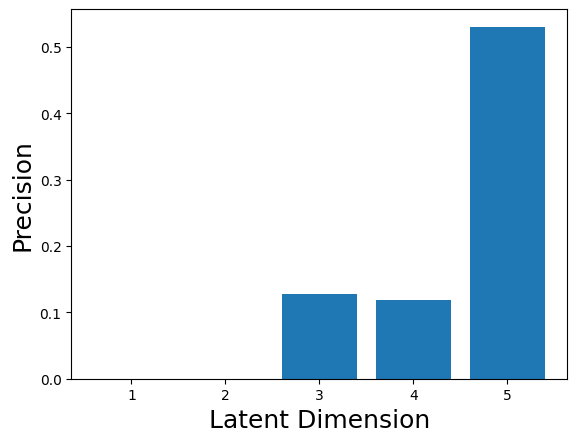

In [7]:
latent_dim = 5  # number of latent dimensions
num_inducing = 8 # number of inducing pts
num_data = Y.shape[0]  # number of data points

X_mean_init = ops.pca_reduce(Y, latent_dim)
X_var_init = tf.ones((num_data, latent_dim), dtype=default_float())

np.random.seed(1)  # for reproducibility
inducing_variable = tf.convert_to_tensor(
    np.random.permutation(X_mean_init.numpy())[:num_inducing], dtype=default_float()
)

lengthscales = tf.convert_to_tensor([1.0] * latent_dim, dtype=default_float())

#kernel = gpflow.kernels.RBF(lengthscales=[1, 1, 1])
kernel = gpflow.kernels.RBF(lengthscales=lengthscales)
print('Ard active: ',kernel.ard)

Bgplvm = gpflow.models.BayesianGPLVM(
    Y,
    X_data_mean=X_mean_init,
    X_data_var=X_var_init,
    kernel=kernel,
    inducing_variable=inducing_variable,
)

Bgplvm.likelihood.variance.assign(0.01)

opt = gpflow.optimizers.Scipy()
_ = opt.minimize(
    Bgplvm.training_loss,
    method="BFGS",
    variables=Bgplvm.trainable_variables,
    options=dict(maxiter=4000)
)

print_summary(kernel)

lengthscales_ = kernel.lengthscales.numpy()
print('lengthscales: ' , lengthscales_)

precision = 1/lengthscales_

print(precision)

# Generate an array of indices for the x-axis
x = np.arange(len(precision))+1

# Create the bar plot
plt.bar(x, precision)

# Add labels and title
plt.xlabel('Latent Dimension',fontsize = 18)
plt.ylabel('Precision',fontsize = 18)
#plt.title('Precision of Latent Dimensions for the Macro Model',fontsize = 18)

plt.savefig('precisions_macro_model.pdf')
# Show the plot
plt.show()



# Train for 2 Dimensions

Ard active:  True


name,class,transform,prior,trainable,shape,dtype,value
SquaredExponential.variance,Parameter,Softplus,,True,(),float64,3.06514
SquaredExponential.lengthscales,Parameter,Softplus,,True,"(2,)",float64,[6.24552 1.91139]


lengthscales:  [6.24552261 1.91138829]
[0.1601147  0.52317993]


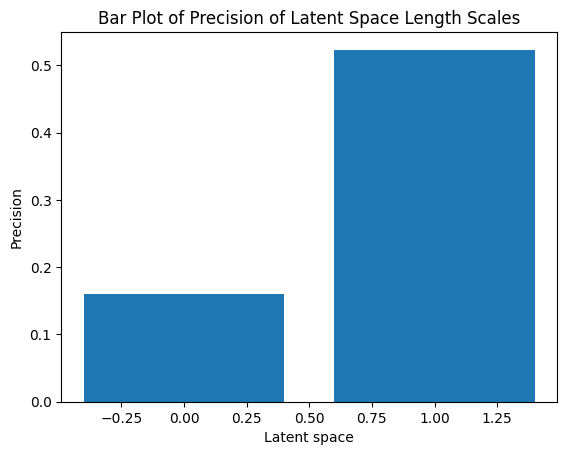

In [8]:
latent_dim = 2  # number of latent dimensions
num_inducing = 8 # number of inducing pts
num_data = Y.shape[0]  # number of data points

X_mean_init = ops.pca_reduce(Y, latent_dim)
X_var_init = tf.ones((num_data, latent_dim), dtype=default_float())

np.random.seed(1)  # for reproducibility
inducing_variable = tf.convert_to_tensor(
    np.random.permutation(X_mean_init.numpy())[:num_inducing], dtype=default_float()
)

lengthscales = tf.convert_to_tensor([1.0] * latent_dim, dtype=default_float())

#kernel = gpflow.kernels.RBF(lengthscales=[1, 1, 1])
kernel = gpflow.kernels.RBF(lengthscales=lengthscales)
print('Ard active: ',kernel.ard)



Bgplvm_2 = gpflow.models.BayesianGPLVM(
    Y,
    X_data_mean=X_mean_init,
    X_data_var=X_var_init,
    kernel=kernel,
    inducing_variable=inducing_variable,
)

Bgplvm_2.likelihood.variance.assign(0.01)

opt = gpflow.optimizers.Scipy()
_ = opt.minimize(
    Bgplvm_2.training_loss,
    method="BFGS",
    variables=Bgplvm_2.trainable_variables,
    options=dict(maxiter=4000)
)

print_summary(kernel)

lengthscales_ = kernel.lengthscales.numpy()
print('lengthscales: ' , lengthscales_)

precision = 1/lengthscales_

print(precision)

# Generate an array of indices for the x-axis
x = np.arange(len(precision))

# Create the bar plot
plt.bar(x, precision)

# Add labels and title
plt.xlabel('Latent space')
plt.ylabel('Precision')
plt.title('Bar Plot of Precision of Latent Space Length Scales')

# Show the plot
plt.show()


from sklearn.decomposition import PCA

Y_flat = Y.reshape(Y.shape[0], -1)
num_comp = 2
pca = PCA(n_components=num_comp)
X_pca = pca.fit_transform(Y_flat)

gplvm_X_mean = Bgplvm_2.X_data_mean.numpy()



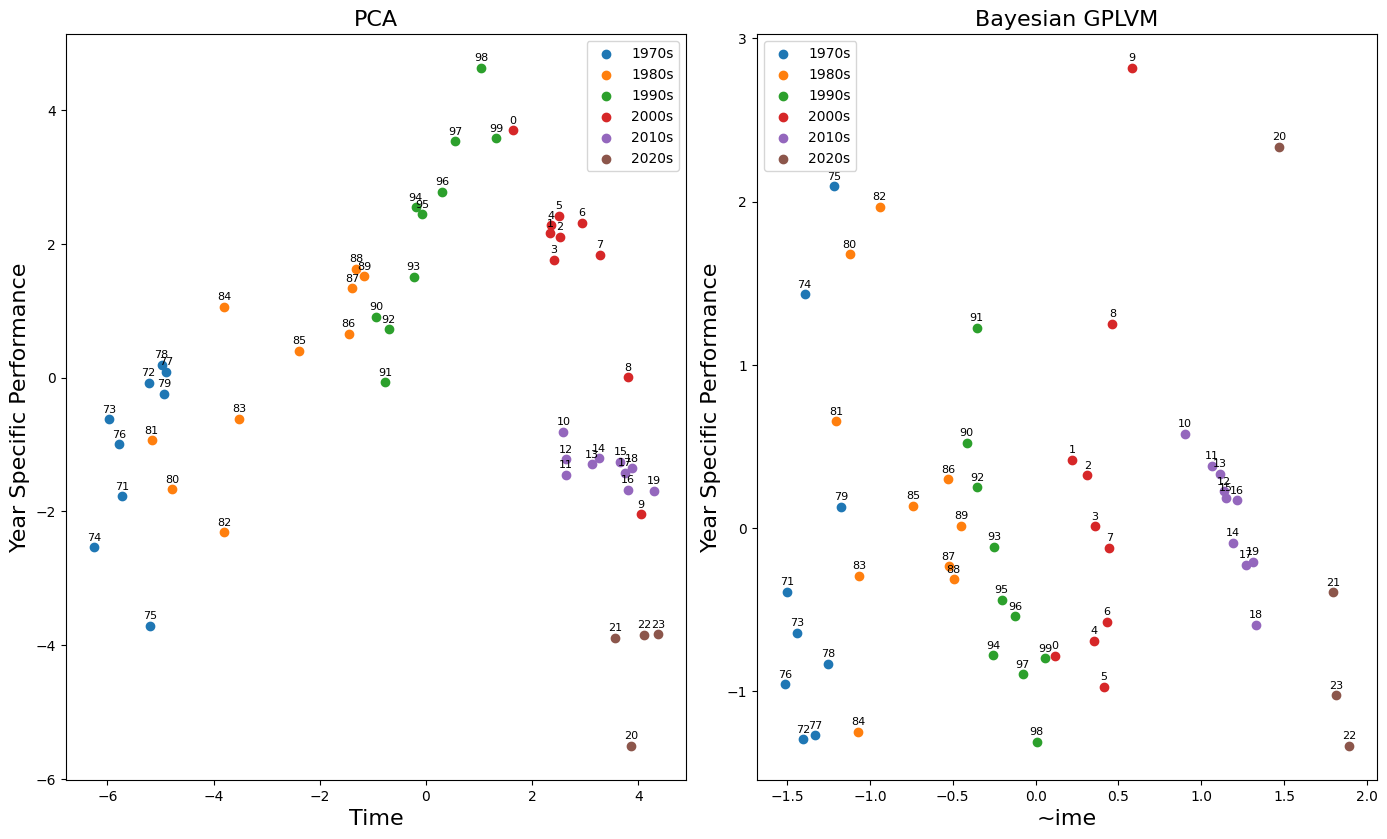

In [9]:
f, ax = plt.subplots(1, 2, figsize=(14, 9))

for i in np.unique(labels):
    ax[0].scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=i)
    ax[1].scatter(gplvm_X_mean[labels == i, 1], gplvm_X_mean[labels == i, 0], label=i)
    ax[0].set_title("PCA",fontsize = 16)
    ax[1].set_title("Bayesian GPLVM",fontsize = 16)
for i,idx in enumerate(years):
    ax[0].annotate(str(idx), (X_pca[i,0], X_pca[i,1]), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=8)

for i,idx in enumerate(years):
    ax[1].annotate(str(idx), (gplvm_X_mean[i,1], gplvm_X_mean[i,0]), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=8)

    # Add legends
ax[0].legend()
ax[1].legend()
ax[0].set_ylabel('Year Specific Performance',fontsize = 16)
ax[0].set_xlabel('Time',fontsize = 16)
ax[1].set_ylabel('Year Specific Performance',fontsize = 16)
ax[1].set_xlabel('~ime',fontsize = 16)


#f.suptitle("PCA Vs Bayesian GPLVM: Two Dimensional Representation of Years (Macro Model)", fontsize=18)

# Adjust the layout to prevent the title from overlapping with subplots
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust this value as needed

plt.savefig('PCA_vs_BGPLVM_Macro.pdf')
plt.show()



# plot uncertainty in 2d for BGPLVM

(10000, 2)
(10000, 29)
(100, 100)


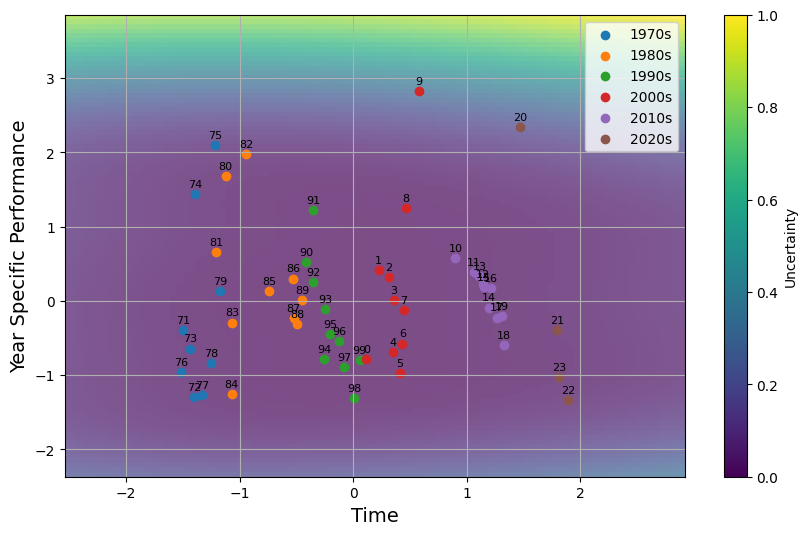

In [10]:
# Define grid over latent space
x_min, x_max = gplvm_X_mean[:, 1].min() - 1, gplvm_X_mean[:, 1].max() + 1
y_min, y_max = gplvm_X_mean[:, 0].min() - 1, gplvm_X_mean[:, 0].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

print(grid_points.shape)

_, grid_uncertainty = Bgplvm_2.predict_f(grid_points)

print(grid_uncertainty.shape)

grid_min = tf.reduce_min(grid_uncertainty)
grid_max = tf.reduce_max(grid_uncertainty)

grid_uncertainty = (grid_uncertainty - grid_min / (grid_max - grid_min)) # normalize uncertainty
grid_uncertainty = grid_uncertainty[:,0]
# Reshape to match grid
print(xx.shape)
grid_uncertainty = tf.reshape(grid_uncertainty,xx.shape)

plt.rcParams['figure.figsize'] = [10, 6]
# Plot the background
plt.pcolormesh(xx, yy, grid_uncertainty, cmap='viridis', alpha=0.7)
for i in np.unique(labels):
    plt.scatter(gplvm_X_mean[labels == i, 1], gplvm_X_mean[labels == i, 0], label=i)


for i,idx in enumerate(years):
    plt.annotate(str(idx), (gplvm_X_mean[i,1], gplvm_X_mean[i,0]), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=8)

plt.legend()
plt.ylabel('Year Specific Performance',fontsize = 14)
plt.xlabel('Time',fontsize = 14)
#plt.title('Two Dimensional Representation of Years (Macro Model)',fontsize = 16)
plt.colorbar(label='Uncertainty')
plt.grid(True)
plt.savefig('2d_uncertainty_macro.pdf')
plt.show()




# Training Model in 3d

Ard active:  True


name,class,transform,prior,trainable,shape,dtype,value
SquaredExponential.variance,Parameter,Softplus,,True,(),float64,4.49532
SquaredExponential.lengthscales,Parameter,Softplus,,True,"(3,)",float64,[9.44132 6.78569 2.43522]


lengthscales:  [9.44132232 6.78569198 2.4352229 ]
[0.10591737 0.14736891 0.41064003]


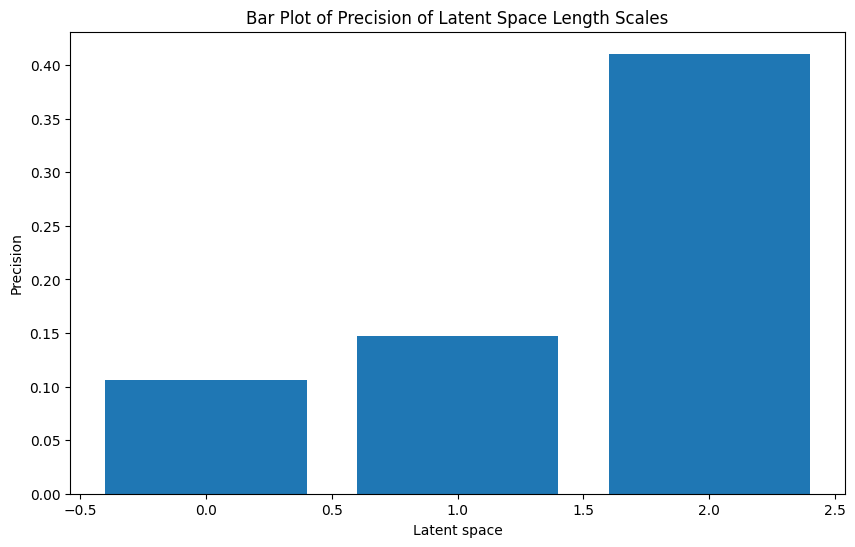

In [11]:
latent_dim = 3  # number of latent dimensions
num_inducing = 8 # number of inducing pts
num_data = Y.shape[0]  # number of data points

X_mean_init = ops.pca_reduce(Y, latent_dim)
X_var_init = tf.ones((num_data, latent_dim), dtype=default_float())

np.random.seed(1)  # for reproducibility
inducing_variable = tf.convert_to_tensor(
    np.random.permutation(X_mean_init.numpy())[:num_inducing], dtype=default_float()
)

lengthscales = tf.convert_to_tensor([1.0] * latent_dim, dtype=default_float())

#kernel = gpflow.kernels.RBF(lengthscales=[1, 1, 1])
kernel = gpflow.kernels.RBF(lengthscales=lengthscales)
print('Ard active: ',kernel.ard)



Bgplvm_3 = gpflow.models.BayesianGPLVM(
    Y,
    X_data_mean=X_mean_init,
    X_data_var=X_var_init,
    kernel=kernel,
    inducing_variable=inducing_variable,
)

Bgplvm_3.likelihood.variance.assign(0.01)

opt = gpflow.optimizers.Scipy()
_ = opt.minimize(
    Bgplvm_3.training_loss,
    method="BFGS",
    variables=Bgplvm_3.trainable_variables,
    options=dict(maxiter=4000)
)

print_summary(kernel)

lengthscales_ = kernel.lengthscales.numpy()
print('lengthscales: ' , lengthscales_)

precision = 1/lengthscales_

print(precision)

# Generate an array of indices for the x-axis
x = np.arange(len(precision))

# Create the bar plot
plt.bar(x, precision)

# Add labels and title
plt.xlabel('Latent space')
plt.ylabel('Precision')
plt.title('Bar Plot of Precision of Latent Space Length Scales')

# Show the plot
plt.show()


from sklearn.decomposition import PCA

Y_flat = Y.reshape(Y.shape[0], -1)
num_comp = 3
pca = PCA(n_components=num_comp)
X_pca = pca.fit_transform(Y_flat)

gplvm_X_mean = Bgplvm_3.X_data_mean.numpy()




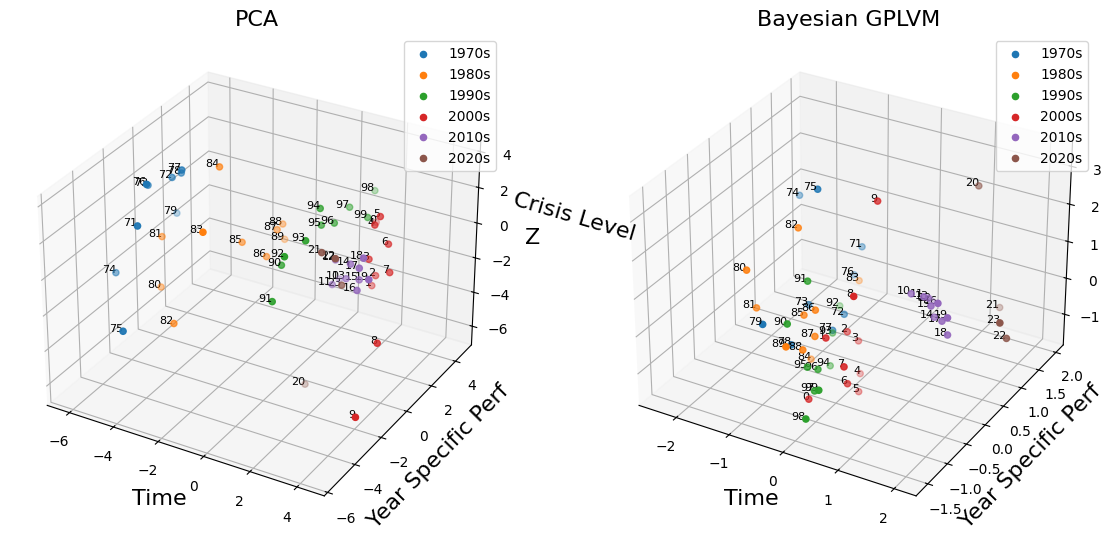

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 1x2 subplot with 3D axes
fig = plt.figure(figsize=(14, 9))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Scatter plot for PCA
for i in np.unique(labels):
    ax1.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], X_pca[labels == i, 2], label=i)

# Scatter plot for Bayesian GPLVM
for i in np.unique(labels):
    ax2.scatter(gplvm_X_mean[labels == i, 2], gplvm_X_mean[labels == i, 1], gplvm_X_mean[labels == i, 0], label=i)

# Annotate points in PCA plot
for i, idx in enumerate(years):
    ax1.text(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], str(idx), fontsize=8, ha='right')

# Annotate points in Bayesian GPLVM plot
for i, idx in enumerate(years):
    ax2.text(gplvm_X_mean[i, 2], gplvm_X_mean[i, 1], gplvm_X_mean[i, 0], str(idx), fontsize=8, ha='right')

# Set titles
ax1.set_title("PCA",fontsize = 16)
ax2.set_title("Bayesian GPLVM",fontsize = 16)

ax1.set_ylabel('Year Specific Perf',fontsize = 16)
ax1.set_xlabel('Time',fontsize = 16)
ax1.set_zlabel('Z',fontsize = 16)

ax2.set_ylabel('Year Specific Perf',fontsize = 16)
ax2.set_xlabel('Time',fontsize = 16)
ax2.text(-5.5, 0, 0.5, 'Crisis Level', 'x', rotation=30, 
        ha='center', va='center', fontsize=16)




#fig.suptitle("PCA Vs Bayesian GPLVM: Three Dimensional Representation of Years (Macro Model)",fontsize = 16)

# Add legends
ax1.legend()
ax2.legend()

plt.savefig('PCA_vs_BGPLVM_Macro_3d.pdf')
plt.show()



# Plotting uncertainty in 3d 

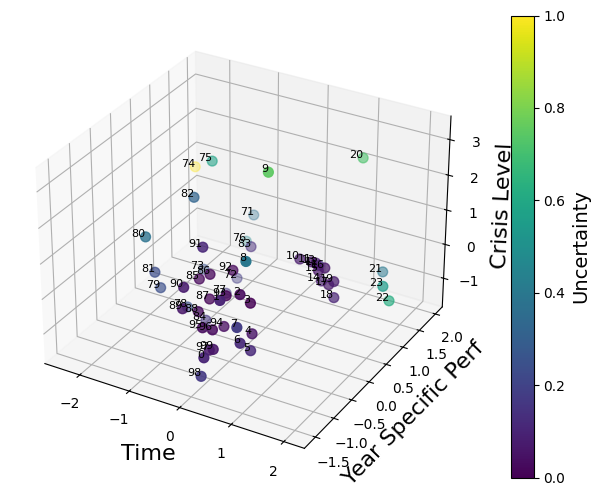

In [13]:
gplvm_X_mean = Bgplvm_3.X_data_mean.numpy()
_, uncertainties = Bgplvm_3.predict_f(gplvm_X_mean)

#print(uncertainties.shape)

grid_min = tf.reduce_min(uncertainties)
grid_max = tf.reduce_max(uncertainties)

uncertainties = (uncertainties - grid_min) / (grid_max - grid_min) # normalize uncertainty
uncertainties = uncertainties[:,0]

#print(uncertainties)

# plotting


gplvm_X_mean = Bgplvm_3.X_data_mean.numpy()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(gplvm_X_mean[:, 2], gplvm_X_mean[:, 1], gplvm_X_mean[:, 0], c=uncertainties, cmap='viridis', s=50)

# Annotate points in Bayesian GPLVM plot
for i, idx in enumerate(years):
   ax.text(gplvm_X_mean[i, 2], gplvm_X_mean[i, 1], gplvm_X_mean[i, 0], str(idx), fontsize=8, ha='right')


# Add color bar to show density scale
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Uncertainty', fontsize = 14)
cbar.set_alpha(0.1)

# Labeling axes
#ax.set_title('Three Dimensional Representation of Years (Macro Model)',fontsize = 16)

ax.set_ylabel('Year Specific Perf',fontsize = 16)
ax.set_xlabel('Time',fontsize = 16)
ax.set_zlabel('Crisis Level',fontsize = 16)

plt.savefig('3d_uncertainty_macro.pdf')
# Show the plot
plt.show()




# Predictions 2010

In [14]:
loc_2010 = data.index.get_loc('2010-01-01')


latent_2010 = gplvm_X_mean[loc_2010]
latent_2010 = tf.reshape(latent_2010,(-1,3))

print(latent_2010)

mean_pred_2010_y, var_pred_2010_y = Bgplvm_3.predict_y(latent_2010)

print('predicting y for 2010:')
print(mean_pred_2010_y)
print(var_pred_2010_y)

mean_pred_2010_f, var_pred_2010_f = Bgplvm_3.predict_f(latent_2010)

print('predicting f for 2010:')
print(mean_pred_2010_f)
print(var_pred_2010_f)

tf.Tensor([[0.31164421 0.60963324 0.59210773]], shape=(1, 3), dtype=float64)
predicting y for 2010:
tf.Tensor(
[[-0.33115557 -0.72114427 -0.15103871  0.3194867  -0.95518728  0.69630608
   0.10666151  0.67420921 -0.32175696  0.61857688 -0.61243082 -0.15226816
   0.44451048  0.6524519  -0.51447998  0.6150348   0.59060535  0.49340727
  -0.49865015  0.59304097 -0.27142963 -0.50709088  0.16961656  0.16914248
   0.08781945 -0.22824129 -1.01046223  0.69523904  0.63873701]], shape=(1, 29), dtype=float64)
tf.Tensor(
[[0.27935213 0.27935213 0.27935213 0.27935213 0.27935213 0.27935213
  0.27935213 0.27935213 0.27935213 0.27935213 0.27935213 0.27935213
  0.27935213 0.27935213 0.27935213 0.27935213 0.27935213 0.27935213
  0.27935213 0.27935213 0.27935213 0.27935213 0.27935213 0.27935213
  0.27935213 0.27935213 0.27935213 0.27935213 0.27935213]], shape=(1, 29), dtype=float64)
predicting f for 2010:
tf.Tensor(
[[-0.33115557 -0.72114427 -0.15103871  0.3194867  -0.95518728  0.69630608
   0.10666151  0.

# Predictions 2020

In [15]:
loc_2020 = data.index.get_loc('2020-01-01')


latent_2020 = gplvm_X_mean[loc_2020]
latent_2020 = tf.reshape(latent_2020,(-1,3))


mean_pred_2020_y, var_pred_2020_y = Bgplvm_3.predict_y(latent_2020)

print('predicting y for 2020:')
print(mean_pred_2020_y)
print(var_pred_2020_y)

mean_pred_2020_f, var_pred_2020_f = Bgplvm_3.predict_f(latent_2020)

print('predicting f for 2020:')
print(mean_pred_2020_f)
print(var_pred_2020_f)

predicting y for 2020:
tf.Tensor(
[[-1.60089888 -0.95734058  0.54090077  0.22568338 -1.02969362  0.66081303
  -1.0315545   1.24101854  0.10840035  1.20968917 -1.98259559 -1.05149554
   1.56870503  0.92537186 -0.50073909  1.43190669  0.54254553  1.17530192
  -1.57537211  1.16731916 -1.67631661 -1.80610908  0.96397746 -0.66855314
  -0.37171032 -1.24366187 -1.5248407   1.15593883  1.09429666]], shape=(1, 29), dtype=float64)
tf.Tensor(
[[0.36630301 0.36630301 0.36630301 0.36630301 0.36630301 0.36630301
  0.36630301 0.36630301 0.36630301 0.36630301 0.36630301 0.36630301
  0.36630301 0.36630301 0.36630301 0.36630301 0.36630301 0.36630301
  0.36630301 0.36630301 0.36630301 0.36630301 0.36630301 0.36630301
  0.36630301 0.36630301 0.36630301 0.36630301 0.36630301]], shape=(1, 29), dtype=float64)
predicting f for 2020:
tf.Tensor(
[[-1.60089888 -0.95734058  0.54090077  0.22568338 -1.02969362  0.66081303
  -1.0315545   1.24101854  0.10840035  1.20968917 -1.98259559 -1.05149554
   1.56870503  0.925

In [16]:
import numpy as np
from sklearn.metrics import pairwise_distances

# Function to calculate Trustworthiness
def trustworthiness(X, X_reduced, n_neighbors=5):
    n = X.shape[0]
    original_distances = pairwise_distances(X)
    reduced_distances = pairwise_distances(X_reduced)
    
    original_ranks = np.argsort(np.argsort(original_distances, axis=1), axis=1)
    reduced_ranks = np.argsort(np.argsort(reduced_distances, axis=1), axis=1)
    
    rank_diffs = np.zeros(n)
    for i in range(n):
        U_k = np.setdiff1d(np.where(reduced_ranks[i, :] < n_neighbors)[0],
                           np.where(original_ranks[i, :] < n_neighbors)[0])
        rank_diffs[i] = np.sum(original_ranks[i, U_k] - n_neighbors)
    
    T = 1 - (2 / (n * n_neighbors * (2 * n - 3 * n_neighbors - 1))) * np.sum(rank_diffs)
    return T

# Function to calculate Continuity
def continuity(X, X_reduced, n_neighbors=5):
    n = X.shape[0]
    original_distances = pairwise_distances(X)
    reduced_distances = pairwise_distances(X_reduced)
    
    original_ranks = np.argsort(np.argsort(original_distances, axis=1), axis=1)
    reduced_ranks = np.argsort(np.argsort(reduced_distances, axis=1), axis=1)
    
    rank_diffs = np.zeros(n)
    for i in range(n):
        V_k = np.setdiff1d(np.where(original_ranks[i, :] < n_neighbors)[0],
                           np.where(reduced_ranks[i, :] < n_neighbors)[0])
        rank_diffs[i] = np.sum(reduced_ranks[i, V_k] - n_neighbors)
    
    C = 1 - (2 / (n * n_neighbors * (2 * n - 3 * n_neighbors - 1))) * np.sum(rank_diffs)
    return C

# Reconstruction Error

In [17]:
from sklearn.metrics import mean_squared_error


pred_y = Bgplvm_3.predict_y(gplvm_X_mean)
pred_y = pred_y[0].numpy()
#print(pred_y.shape)
#print(Y.shape)
number_of_features = Y.shape[1]
pred_pca = pca.inverse_transform(X_pca)

MSE_BGPLVM = mean_squared_error(Y,pred_y)
trust_BGPLVM = trustworthiness(Y,gplvm_X_mean)
cont_BGPLVM = continuity(Y,gplvm_X_mean)

MSE_PCA = mean_squared_error(Y,pred_pca)
trust_PCA = trustworthiness(Y,X_pca)
cont_PCA = continuity(Y,X_pca)



print('MSE_BGPLVM: ',MSE_BGPLVM, '; per feature:', MSE_BGPLVM/number_of_features, ' ; trustworthiness: ', trust_BGPLVM, ' ; continuity: ',cont_BGPLVM)

print('MSE_PCA: ',MSE_PCA, '; per feature:', MSE_PCA/number_of_features ,' ; trustworthiness: ', trust_PCA, ' ; continuity: ',cont_PCA)


MSE_BGPLVM:  0.19717014041854208 ; per feature: 0.006798970359260072  ; trustworthiness:  0.9724947589098533  ; continuity:  0.9781132075471698
MSE_PCA:  0.2780383489978318 ; per feature: 0.009587529275787304  ; trustworthiness:  0.9763522012578616  ; continuity:  0.9890985324947589


# Variable Definitions


## 1. GDP
* measured in: GDP in Billions of Chained 2017 Dollars and % change. 
* description: Real gross domestic product is the inflation adjusted value of the goods and services produced by labor and property located in the United States.For more information see the Guide to the National Income and Product Accounts of the United States (NIPA). For more information, please visit the Bureau of Economic Analysis.

Suggested Citation:
U.S. Bureau of Economic Analysis, Real Gross Domestic Product [GDPC1], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDPC1, August 10, 2024.

## 2. Unemployment -- 
* measured in: % and % change.

* Description: The unemployment rate represents the number of unemployed as a percentage of the labor force. Labor force data are restricted to people 16 years of age and older, who currently reside in 1 of the 50 states or the District of Columbia, who do not reside in institutions (e.g., penal and mental facilities, homes for the aged), and who are not on active duty in the Armed Forces.

This rate is also defined as the U-3 measure of labor underutilization.

The series comes from the 'Current Population Survey (Household Survey)'

The source code is: LNS14000000

Suggested Citation:
U.S. Bureau of Labor Statistics, Unemployment Rate [UNRATE], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/UNRATE, August 10, 2024.

## 3. Inflation -- 
* measured in: % 

* Description: Inflation as measured by the consumer price index reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly. The Laspeyres formula is generally used.

International Monetary Fund, International Financial Statistics and data files.

Suggested Citation:
World Bank, Inflation, consumer prices for the United States [FPCPITOTLZGUSA], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/FPCPITOTLZGUSA, August 10, 2024.

## 4. Interest Rates (IR) (federal funds) -- 
* measured in: % 

* Description: The federal funds rate is the interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with each other overnight. When a depository institution has surplus balances in its reserve account, it lends to other banks in need of larger balances. In simpler terms, a bank with excess cash, which is often referred to as liquidity, will lend to another bank that needs to quickly raise liquidity. (1) The rate that the borrowing institution pays to the lending institution is determined between the two banks; the weighted average rate for all of these types of negotiations is called the effective federal funds rate.(2) The effective federal funds rate is essentially determined by the market but is influenced by the Federal Reserve through open market operations to reach the federal funds rate target.(2)

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Federal Funds Effective Rate [DFF], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/DFF, August 10, 2024.

## 5. Government Debt -- 
* measured in: 2022 = 100 (index)

* Description: Money the Uited States Government owes to its creditors. 

Suggested Citation:

U.S. Department of the Treasury. Fiscal Service, Federal Debt: Total Public Debt [GFDEBTN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GFDEBTN, August 10, 2024.

## 6. Government Deficit -- 
* measured in: Percent Change from last year 

* Description: Government revenue - government spending.

Suggested Citation:
U.S. Bureau of Economic Analysis, Federal government budget surplus or deficit (-) [M318501Q027NBEA], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/M318501Q027NBEA, August 10, 2024.

## 7. Commodity Trade Balance  -- 
* measured in: Percent Change from last year 

* Description: net amount of commodities traded.

Suggested Citation:
Organization for Economic Co-operation and Development, International Merchandise Trade Statistics: Trade Balance: Commodities for United States [XTNTVA01USM664S], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/XTNTVA01USM664S, August 10, 2024.

## 8. Producer Price Index  (PPI) -- 
* measured in: index 1982=100, Not Seasonally Adjusted

* Description: The Producer Price Index (PPI) measures the average change in selling prices received by domestic producers for their goods and services over time, reflecting inflation at the wholesale level before it reaches consumers.

Suggested Citation:
U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: All Commodities [PPIACO], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PPIACO, August 10, 2024.

## 9. Industrial Production   -- 
* measured in: Percent change in Index 2017=100, Seasonally Adjusted 

* Description: The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Total Index [INDPRO], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/INDPRO, August 10, 2024.



# 10. Money Supply 2   -- 
* measured in: Billions of 1982-84 Dollars, Seasonally Adjusted

* Description: Beginning May 2020, M2 consists of M1 plus (1) small-denomination time deposits (time deposits in amounts of less than $100,000) less IRA and Keogh balances at depository institutions; and (2) balances in retail MMFs less IRA and Keogh balances at MMFs. Seasonally adjusted M2 is constructed by summing savings deposits (before May 2020), small-denomination time deposits, and retail MMFs, each seasonally adjusted separately, and adding this result to seasonally adjusted M1.

In essence: M2 is a measure of the money supply that includes cash, checking deposits, and easily convertible near money, such as savings deposits, money market securities, and small time deposits.

Suggested Citation:
Federal Reserve Bank of St. Louis, Real M2 Money Stock [M2REAL], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/M2REAL, August 10, 2024.

# 11. Exchange Rate with Japan   -- 
* measured in: Japanese Yen to One U.S. Dollar, Not Seasonally Adjusted

* Description: Noon buying rates in New York City for cable transfers payable in foreign currencies (Japan).

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Japanese Yen to U.S. Dollar Spot Exchange Rate [DEXJPUS], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/DEXJPUS, August 10, 2024.


# 12. Employment to population ratio   -- 
* measured in: percent

* Description: All employed/ population

Suggested Citation:
U.S. Bureau of Labor Statistics, Employment-Population Ratio [EMRATIO], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/EMRATIO, August 10, 2024.

# 13. Housing Starts   -- 
* measured in: percent change from last year 

* Description: As provided by the Census, start occurs when excavation begins for the footings or foundation of a building. All housing units in a multifamily building are defined as being started when this excavation begins. Beginning with data for September 1992, estimates of housing starts include units in structures being totally rebuilt on an existing foundation.

Suggested Citation:
U.S. Census Bureau and U.S. Department of Housing and Urban Development, New Privately-Owned Housing Units Started: Total Units [HOUST], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/HOUST, August 10, 2024.

# 14. Corporate Profits after tax    -- 
* measured in: percent change from last year 

* Description: Total corporate profits after tax. 

Suggested Citation:
U.S. Bureau of Economic Analysis, Corporate Profits After Tax (without IVA and CCAdj) [CP], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CP, August 10, 2024.

# 15. Labor Force Participation Rate   -- 
* measured in: percent 

* Description: The Labor Force Participation Rate is defined by the Current Population Survey (CPS) as “the number of people in the labor force as a percentage of the civilian noninstitutional population […] the participation rate is the percentage of the population that is either working or actively looking for work.” 

Suggested Citation:
U.S. Bureau of Labor Statistics, Labor Force Participation Rate [CIVPART], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CIVPART, August 10, 2024.


# 16. Current Account: Balance (Revenue Minus Expenditure) for United States    -- 
* measured in: Percentage of GDP, Seasonally Adjusted

* Description: Revenue Minus Expenditure

Suggested Citation:
Organization for Economic Co-operation and Development, Balance of Payments: Current Account: Balance (Revenue Minus Expenditure) for United States [USAB6BLTT02STSAQ], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/USAB6BLTT02STSAQ, August 10, 2024.

# 17. Capital Expenditure   -- 
* measured in: Percentage change from last year. 

* Description: Capital expenditure (CapEx) refers to the funds that a company or government spends on acquiring, maintaining, or improving long-term assets, such as property, buildings, equipment, or infrastructure, which are expected to provide benefits over a long period.

Suggested Citation:
Organization for Economic Co-operation and Development, National Accounts: GDP by Expenditure: Current Prices: Gross Fixed Capital Formation for United States [USAGFCFQDSMEI], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/USAGFCFQDSMEI, August 10, 2024.

# 18. Personal Consumption Expenditures  -- 
* measured in: Index, 2017 = 100  

* Description: The Personal Consumption Expenditures (PCE) Price Index is a measure of the average change in prices paid by consumers for goods and services over time, often used by the Federal Reserve to assess inflation and adjust monetary policy.

Suggested Citation:
U.S. Bureau of Economic Analysis, Personal Consumption Expenditures [PCE], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PCE, August 10, 2024.


# 19. Gross Private Domestic Investment  -- 
* measured in: Percent change from last year.   

* Description: Gross Private Domestic Expenditure (GPDE) refers to the total spending by private entities within a country's borders on goods and services, excluding government expenditures. It includes investments in business capital, residential construction, and changes in business inventories, reflecting the private sector's contribution to the economy. GPDE is a key component of Gross Domestic Product (GDP) and is used to gauge economic activity and growth driven by private investment and consumption.

Suggested Citation:
U.S. Bureau of Economic Analysis, Gross Private Domestic Investment [GPDI], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GPDI, August 10, 2024.

# 20. Real Government Consumption Expenditures and Gross Investment  -- 
* measured in: Billions of Chained 2017 Dollars, Seasonally Adjusted Annual Rate.   

* Description: Government consumption expenditures and gross investment measures the
portion of gross domestic product (GDP), or final expenditures, that is accounted for by
the government sector.

Suggested Citation:
U.S. Bureau of Economic Analysis, Real Government Consumption Expenditures and Gross Investment [GCEC1], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GCEC1, August 10, 2024.

# 21. Real Disposable Personal Income  -- 
* measured in: Billions of Chained 2017 Dollars, Seasonally Adjusted Annual Rate   

* Description: Income that people get from wages and salaries, Social Security and other government benefits, dividends and interest, business ownership, and other sources. These statistics can offer clues to Americans' financial health and future consumer spending.

Suggested Citation:
U.S. Bureau of Economic Analysis, Real Disposable Personal Income [DSPIC96], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/DSPIC96, August 10, 2024.

# 22. Government Interest Payments  -- 
* measured in: Percent change from last year

* Description: Interest on government's debt. 

Suggested Citation:
U.S. Bureau of Economic Analysis, Federal government current expenditures: Interest payments [A091RC1Q027SBEA], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/A091RC1Q027SBEA, August 10, 2024.


# 23. Non - Farm Pay Rolls  -- 
* measured in: Percent change from last year    

* Description: All Employees: Total Nonfarm, commonly known as Total Nonfarm Payroll, is a measure of the number of U.S. workers in the economy that excludes proprietors, private household employees, unpaid volunteers, farm employees, and the unincorporated self-employed. This measure accounts for approximately 80 percent of the workers who contribute to Gross Domestic Product (GDP).

Suggested Citation:
U.S. Bureau of Labor Statistics, All Employees, Total Nonfarm [PAYEMS], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PAYEMS, August 10, 2024.


# 24. Personal Savings Rate -- 
* measured in: Percent   

* Description: Personal saving as a percentage of disposable personal income (DPI), frequently referred to as "the personal saving rate," is calculated as the ratio of personal saving to DPI.
Personal saving is equal to personal income less personal outlays and personal taxes; it may generally be viewed as the portion of personal income that is used either to provide funds to capital markets or to invest in real assets such as residences.

Suggested Citation:
U.S. Bureau of Economic Analysis, Personal Saving Rate [PSAVERT], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PSAVERT, August 10, 2024.

# 25. Velocity of M2 -- 
* measured in: Ratio ~1.5   

* Description: Calculated as the ratio of quarterly nominal GDP to the quarterly average of M2 money stock.

The velocity of money is the frequency at which one unit of currency is used to purchase domestically- produced goods and services within a given time period. In other words, it is the number of times one dollar is spent to buy goods and services per unit of time. If the velocity of money is increasing, then more transactions are occurring between individuals in an economy.


Suggested Citation:
Federal Reserve Bank of St. Louis, Velocity of M2 Money Stock [M2V], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/M2V, August 11, 2024.

# 26. C02 -- 
* measured in: Million Metric Tons CO2   

* Description: Volume of Co2 produced in a given year

Suggested Citation:
U.S. Energy Information Administration, Total Carbon Dioxide Emissions From All Sectors, All Fuels for United States [EMISSCO2TOTVTTTOUSA], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/EMISSCO2TOTVTTTOUSA, August 11, 2024.

# 27. GINI index (Income Inequality) -- 
* measured in: Index

* Description: Gini index measures the extent to which the distribution of income or consumption expenditure among individuals or households within an economy deviates from a perfectly equal distribution. A Lorenz curve plots the cumulative percentages of total income received against the cumulative number of recipients, starting with the poorest individual or household. The Gini index measures the area between the Lorenz curve and a hypothetical line of absolute equality, expressed as a percentage of the maximum area under the line. Thus a Gini index of 0 represents perfect equality, while an index of 100 implies perfect inequality.

Suggested Citation:
World Bank, GINI Index for the United States [SIPOVGINIUSA], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/SIPOVGINIUSA, August 11, 2024.

# 28. Life Expectancy -- 
* measured in: Number of Years   

* Description: Life expectancy at birth indicates the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life.


Suggested Citation:
World Bank, Life Expectancy at Birth, Total for the United States [SPDYNLE00INUSA], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/SPDYNLE00INUSA, August 11, 2024.

# 29. Michigan Consumer Sentiment Index    -- 
* measured in: Index 1966:Q1=100, Not Seasonally Adjusted 

* Description: Measures consumers' outlook on the economy. 

Suggested Citation:
University of Michigan, University of Michigan: Consumer Sentiment [UMCSENT], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/UMCSENT, August 10, 2024.

# 30. Age Dependency Ratio    -- 
* measured in: Percent of Working-Age Population 

* Description: Age dependency ratio, old, is the ratio of older dependents (people older than 64) to the working-age population (those ages 15-64). Data are shown as the proportion of dependents per 100 working-age population.

Suggested Citation:
World Bank, Age Dependency Ratio: Older Dependents to Working-Age Population for the United States [SPPOPDPNDOLUSA], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/SPPOPDPNDOLUSA, August 11, 2024.